# Data Exploration Notebook

In [98]:
import pandas as pd
import glob
import os
from pathlib import Path, PureWindowsPath
import matplotlib
import cv2
import numpy as np
%matplotlib inline

Data is in the data subdirectory with subdirectories for different runs of the training simulator

In [6]:
data_dir = 'data'

In [8]:
data_folders = glob.glob(os.path.join(data_dir, '*'))
data_folders

['data/driving_data_2', 'data/driving_data_1', 'data/driving_data_3']

Each folder contains a log and the associated images in the IMG folder

In [10]:
for folder in data_folders:
    files = glob.glob(os.path.join(folder, '*'))
    print(files)

['data/driving_data_2/driving_log.csv', 'data/driving_data_2/IMG']
['data/driving_data_1/driving_log.csv', 'data/driving_data_1/IMG']
['data/driving_data_3/driving_log.csv', 'data/driving_data_3/IMG']


# Explore Logs

Lets explore the logs by opening them and appending it all

In [122]:
for i in range(len(files)+1):
    print('dataset: {0}'.format(i))
    folder_name = data_folders[i].split('/')[1]
    log_file = os.path.join(data_folders[i], 'driving_log.csv')
    data_file = pd.read_csv(log_file, names=['center_image', 'left_image', 'right_image', 'steering_angle', 'throttle', 'break', 'speed'])
    data_file['folder'] = folder_name
    if i == 0:
        merged_log = data_file
    else:
        merged_log = merged_log.append(data_file, ignore_index=True)
    print('dataset_size: {0}'.format(merged_log.shape))

dataset: 0
dataset_size: (2708, 8)
dataset: 1
dataset_size: (4037, 8)
dataset: 2
dataset_size: (7921, 8)


In [124]:
merged_log.head()

,center_image,left_image,right_image,steering_angle,throttle,break,speed,folder
0,C:\Users\Bopl\Desktop\driving_data\IMG\center_...,C:\Users\Bopl\Desktop\driving_data\IMG\left_20...,C:\Users\Bopl\Desktop\driving_data\IMG\right_2...,0.0,0.0,0.0,24.62923,driving_data_2
1,C:\Users\Bopl\Desktop\driving_data\IMG\center_...,C:\Users\Bopl\Desktop\driving_data\IMG\left_20...,C:\Users\Bopl\Desktop\driving_data\IMG\right_2...,0.0,0.0,0.0,24.43121,driving_data_2
2,C:\Users\Bopl\Desktop\driving_data\IMG\center_...,C:\Users\Bopl\Desktop\driving_data\IMG\left_20...,C:\Users\Bopl\Desktop\driving_data\IMG\right_2...,0.0,0.0,0.0,24.23477,driving_data_2
3,C:\Users\Bopl\Desktop\driving_data\IMG\center_...,C:\Users\Bopl\Desktop\driving_data\IMG\left_20...,C:\Users\Bopl\Desktop\driving_data\IMG\right_2...,0.0,0.0,0.0,24.08849,driving_data_2
4,C:\Users\Bopl\Desktop\driving_data\IMG\center_...,C:\Users\Bopl\Desktop\driving_data\IMG\left_20...,C:\Users\Bopl\Desktop\driving_data\IMG\right_2...,0.0,0.0,0.0,23.94309,driving_data_2


# Correcting Image Locations

The data was logged on a windows computer and hence the slashes and file path are wrong for model training on a linux machine

In [125]:
# need to correct for data_dir and 
def file_path_to_name(value):
    wind_path = PureWindowsPath(value)
    unix_path = Path(wind_path)
    return unix_path.name

In [126]:
# take the column and reduces it to the filename
for path in ['center_image', 'left_image', 'right_image']:
    merged_log[path] = merged_log[path].apply(file_path_to_name)

In [127]:
merged_log.head()

,center_image,left_image,right_image,steering_angle,throttle,break,speed,folder
0,center_2019_05_24_13_42_51_893.jpg,left_2019_05_24_13_42_51_893.jpg,right_2019_05_24_13_42_51_893.jpg,0.0,0.0,0.0,24.62923,driving_data_2
1,center_2019_05_24_13_42_51_970.jpg,left_2019_05_24_13_42_51_970.jpg,right_2019_05_24_13_42_51_970.jpg,0.0,0.0,0.0,24.43121,driving_data_2
2,center_2019_05_24_13_42_52_041.jpg,left_2019_05_24_13_42_52_041.jpg,right_2019_05_24_13_42_52_041.jpg,0.0,0.0,0.0,24.23477,driving_data_2
3,center_2019_05_24_13_42_52_111.jpg,left_2019_05_24_13_42_52_111.jpg,right_2019_05_24_13_42_52_111.jpg,0.0,0.0,0.0,24.08849,driving_data_2
4,center_2019_05_24_13_42_52_179.jpg,left_2019_05_24_13_42_52_179.jpg,right_2019_05_24_13_42_52_179.jpg,0.0,0.0,0.0,23.94309,driving_data_2


# Check out the steering angles and other numbers

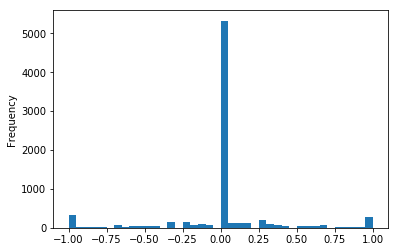

In [128]:
merged_log['steering_angle'].plot.hist(bins=40)

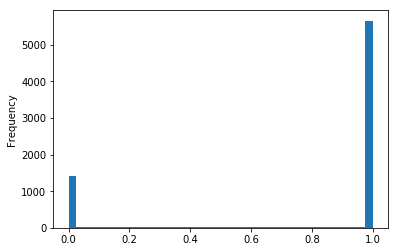

In [129]:
merged_log['throttle'].plot.hist(bins=40)

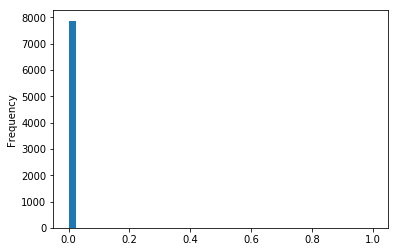

In [130]:
merged_log['break'].plot.hist(bins=40)

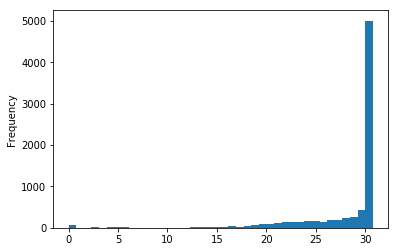

In [131]:
merged_log['speed'].plot.hist(bins=40)

# Visualise an image

driving_data_2
<class 'numpy.ndarray'>


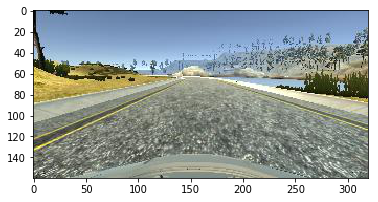

In [132]:
import matplotlib.pyplot as plt


for line in range(1):
    print(merged_log['folder'][line])
    path = os.path.join('.', data_dir, merged_log['folder'][line], 'IMG', merged_log['center_image'][line])
    image = plt.imread(path)
    print(type(image))
    plt.imshow(image)

Look at image values

In [133]:
for rn, row in merged_log.iterrows():
    path = os.path.join('.', data_dir, row['folder'], 'IMG', row['center_image'])
    image = plt.imread(path)
    print('max: {0}, min: {1}, mean: {2}'.format(np.max(image), np.min(image), np.mean(image)))

max: 255, min: 0, mean: 141.18352213541667
max: 255, min: 0, mean: 140.48166666666665
max: 255, min: 0, mean: 140.68955729166666
max: 255, min: 0, mean: 141.03475911458332
max: 255, min: 0, mean: 140.82875651041667
max: 255, min: 0, mean: 140.89156901041667
max: 255, min: 0, mean: 140.983125
max: 255, min: 0, mean: 141.1278125
max: 255, min: 0, mean: 141.57268229166667
max: 255, min: 0, mean: 142.35427083333335
max: 255, min: 0, mean: 142.12180338541665
max: 255, min: 0, mean: 142.13818359375
max: 255, min: 0, mean: 141.98998697916667
max: 255, min: 0, mean: 142.9591015625
max: 255, min: 0, mean: 143.14794270833335
max: 255, min: 0, mean: 143.88820963541667
max: 255, min: 0, mean: 144.015078125
max: 255, min: 0, mean: 144.16659505208332
max: 255, min: 0, mean: 143.72716796875
max: 255, min: 0, mean: 143.33651041666667
max: 255, min: 0, mean: 144.36486328125
max: 255, min: 0, mean: 144.1728125
max: 255, min: 0, mean: 143.53056640625
max: 255, min: 0, mean: 143.62838541666667
max: 255, m

max: 255, min: 0, mean: 139.28972005208334
max: 255, min: 0, mean: 140.23479166666667
max: 255, min: 0, mean: 142.34064453125
max: 255, min: 0, mean: 145.41185546875
max: 255, min: 0, mean: 145.88043619791668
max: 255, min: 0, mean: 146.26117838541666
max: 255, min: 0, mean: 145.90027994791666
max: 255, min: 0, mean: 145.70911458333333
max: 255, min: 0, mean: 145.40141276041666
max: 255, min: 0, mean: 145.547265625
max: 255, min: 0, mean: 145.3055078125
max: 255, min: 0, mean: 145.43608723958334
max: 255, min: 0, mean: 146.121796875
max: 255, min: 0, mean: 145.95537760416667
max: 255, min: 0, mean: 144.87404296875
max: 255, min: 0, mean: 145.29934244791667
max: 255, min: 0, mean: 144.95388020833335
max: 255, min: 0, mean: 144.30708333333334
max: 255, min: 0, mean: 144.87697265625
max: 255, min: 0, mean: 145.54014973958334
max: 255, min: 0, mean: 145.92384114583334
max: 255, min: 0, mean: 144.82522135416667
max: 255, min: 0, mean: 145.18701822916665
max: 255, min: 0, mean: 144.569225260

max: 255, min: 0, mean: 130.23093098958333
max: 255, min: 0, mean: 131.00126302083333
max: 255, min: 0, mean: 132.28192708333333
max: 255, min: 0, mean: 133.26067057291667
max: 255, min: 0, mean: 134.34380208333334
max: 255, min: 0, mean: 134.69119791666665
max: 255, min: 0, mean: 134.467109375
max: 255, min: 0, mean: 134.32714192708335
max: 255, min: 0, mean: 132.75756510416667
max: 255, min: 0, mean: 132.11811848958334
max: 255, min: 0, mean: 131.41375
max: 255, min: 0, mean: 130.30867838541667
max: 255, min: 0, mean: 129.67181640625
max: 255, min: 0, mean: 129.6124609375
max: 255, min: 0, mean: 129.48113932291668
max: 255, min: 0, mean: 128.94106119791667
max: 255, min: 0, mean: 129.43762369791668
max: 255, min: 0, mean: 128.98576822916667
max: 255, min: 0, mean: 129.17348958333332
max: 255, min: 0, mean: 129.02037760416667
max: 255, min: 0, mean: 129.60836588541667
max: 255, min: 0, mean: 129.45886067708332
max: 255, min: 0, mean: 128.83940755208334
max: 255, min: 0, mean: 128.8528

max: 255, min: 0, mean: 148.42613932291667
max: 255, min: 0, mean: 148.61814453125
max: 255, min: 0, mean: 149.13292317708334
max: 255, min: 0, mean: 148.97942057291667
max: 255, min: 0, mean: 149.28918619791668
max: 255, min: 0, mean: 150.29393880208335
max: 255, min: 0, mean: 150.76899088541666
max: 255, min: 0, mean: 151.41324869791666
max: 255, min: 0, mean: 151.64711588541667
max: 255, min: 0, mean: 152.09975260416667
max: 255, min: 0, mean: 152.1312109375
max: 255, min: 0, mean: 152.23952473958335
max: 255, min: 0, mean: 151.80761067708335
max: 255, min: 0, mean: 151.80977864583335
max: 255, min: 0, mean: 151.2774609375
max: 255, min: 0, mean: 151.180078125
max: 255, min: 0, mean: 150.69989583333333
max: 255, min: 0, mean: 151.27604166666666
max: 255, min: 0, mean: 151.8950390625
max: 255, min: 0, mean: 151.81083333333333
max: 255, min: 0, mean: 152.08927083333333
max: 255, min: 0, mean: 152.82169921875
max: 255, min: 0, mean: 153.6234375
max: 255, min: 0, mean: 153.76880859375
m

max: 255, min: 0, mean: 133.99849609375
max: 255, min: 0, mean: 134.54514973958334
max: 255, min: 0, mean: 135.84604166666668
max: 255, min: 0, mean: 135.312109375
max: 255, min: 0, mean: 135.61459635416668
max: 255, min: 0, mean: 136.16137369791667
max: 255, min: 0, mean: 136.22472005208334
max: 255, min: 0, mean: 135.5139453125
max: 255, min: 0, mean: 135.20354166666667
max: 255, min: 0, mean: 135.40602213541666
max: 255, min: 0, mean: 135.44977213541668
max: 255, min: 0, mean: 135.40025390625
max: 255, min: 0, mean: 136.75365234375
max: 255, min: 0, mean: 137.13927734375
max: 255, min: 0, mean: 137.14006510416667
max: 255, min: 0, mean: 136.96154296875
max: 255, min: 0, mean: 138.25286458333332
max: 255, min: 0, mean: 138.62330078125
max: 255, min: 0, mean: 138.11565104166667
max: 255, min: 0, mean: 137.47761067708333
max: 255, min: 0, mean: 137.06120442708334
max: 255, min: 0, mean: 136.6497265625
max: 255, min: 0, mean: 136.09291015625
max: 255, min: 0, mean: 136.31682942708332
ma

max: 255, min: 0, mean: 145.8676953125
max: 255, min: 0, mean: 145.63372395833332
max: 255, min: 0, mean: 146.10180989583333
max: 255, min: 0, mean: 144.86662109375
max: 255, min: 0, mean: 144.40848958333333
max: 255, min: 0, mean: 143.61620442708335
max: 255, min: 0, mean: 142.48376302083332
max: 255, min: 0, mean: 142.44712239583333
max: 255, min: 0, mean: 142.56699869791666
max: 255, min: 0, mean: 142.0646484375
max: 255, min: 0, mean: 141.521640625
max: 255, min: 0, mean: 141.36401041666667
max: 255, min: 0, mean: 140.98252604166666
max: 255, min: 0, mean: 141.01658203125
max: 255, min: 0, mean: 141.66212239583334
max: 255, min: 0, mean: 143.33647786458334
max: 255, min: 0, mean: 143.74313151041667
max: 255, min: 0, mean: 143.89125
max: 255, min: 0, mean: 143.9699609375
max: 255, min: 0, mean: 144.12202473958334
max: 255, min: 0, mean: 144.21774739583333
max: 255, min: 0, mean: 144.01432291666666
max: 255, min: 0, mean: 144.58145833333333
max: 255, min: 0, mean: 144.31623697916666


max: 255, min: 0, mean: 130.62388671875
max: 255, min: 0, mean: 130.66313151041666
max: 255, min: 0, mean: 130.37826171875
max: 255, min: 0, mean: 130.25444661458334
max: 255, min: 0, mean: 130.98141276041667
max: 255, min: 0, mean: 131.73609375
max: 255, min: 0, mean: 131.48151041666668
max: 255, min: 0, mean: 131.93453776041667
max: 255, min: 0, mean: 131.73479817708332
max: 255, min: 0, mean: 131.78956380208334
max: 255, min: 0, mean: 131.563125
max: 255, min: 0, mean: 132.00638020833333
max: 255, min: 0, mean: 131.1253125
max: 255, min: 0, mean: 130.548359375
max: 255, min: 0, mean: 130.3847265625
max: 255, min: 0, mean: 129.93703125
max: 255, min: 0, mean: 128.986484375
max: 255, min: 0, mean: 127.75662760416667
max: 255, min: 0, mean: 127.69479166666666
max: 255, min: 0, mean: 127.5001171875
max: 255, min: 0, mean: 126.97264973958333
max: 255, min: 0, mean: 126.38569661458334
max: 255, min: 0, mean: 126.12145833333334
max: 255, min: 0, mean: 128.517265625
max: 255, min: 0, mean: 

max: 255, min: 0, mean: 151.8712109375
max: 255, min: 0, mean: 151.41013020833333
max: 255, min: 0, mean: 151.64095703125
max: 255, min: 0, mean: 151.29658203125
max: 255, min: 0, mean: 151.51833333333335
max: 255, min: 0, mean: 151.03916015625
max: 255, min: 0, mean: 151.23977864583333
max: 255, min: 0, mean: 151.53720052083332
max: 255, min: 0, mean: 151.84634114583332
max: 255, min: 0, mean: 152.13215494791666
max: 255, min: 0, mean: 151.94172526041666
max: 255, min: 0, mean: 151.7219921875
max: 255, min: 0, mean: 151.76923828125
max: 255, min: 0, mean: 151.27096354166667
max: 255, min: 0, mean: 150.98957682291666
max: 255, min: 0, mean: 150.72211588541666
max: 255, min: 0, mean: 150.28315104166666
max: 255, min: 0, mean: 149.95634114583333
max: 255, min: 0, mean: 150.16227213541666
max: 255, min: 0, mean: 150.27552734375
max: 255, min: 0, mean: 150.24172526041667
max: 255, min: 0, mean: 150.44162760416665
max: 255, min: 0, mean: 150.66326822916668
max: 255, min: 0, mean: 151.488053

max: 255, min: 0, mean: 129.5169921875
max: 255, min: 0, mean: 129.38314453125
max: 255, min: 0, mean: 129.02030598958333
max: 255, min: 0, mean: 128.98388671875
max: 255, min: 0, mean: 129.9025390625
max: 255, min: 0, mean: 131.20205078125
max: 255, min: 0, mean: 132.3859375
max: 255, min: 0, mean: 133.10180989583333
max: 255, min: 0, mean: 133.21170572916665
max: 255, min: 0, mean: 133.57478515625
max: 255, min: 0, mean: 133.25908854166667
max: 255, min: 0, mean: 133.62745442708334
max: 255, min: 0, mean: 134.34850911458332
max: 255, min: 0, mean: 135.95037760416668
max: 255, min: 0, mean: 136.64904296875
max: 255, min: 0, mean: 136.90458333333333
max: 255, min: 0, mean: 137.36277994791666
max: 255, min: 0, mean: 137.88451171875
max: 255, min: 0, mean: 137.7334375
max: 255, min: 0, mean: 137.86803385416667
max: 255, min: 0, mean: 138.40120442708334
max: 255, min: 0, mean: 138.68432942708333
max: 255, min: 0, mean: 139.2098828125
max: 255, min: 0, mean: 140.51143229166667
max: 255, mi

max: 255, min: 0, mean: 133.46420572916668
max: 255, min: 0, mean: 129.24384114583333
max: 255, min: 0, mean: 123.99477213541667
max: 255, min: 0, mean: 120.325078125
max: 255, min: 0, mean: 117.69140625
max: 255, min: 0, mean: 118.6369921875
max: 255, min: 0, mean: 121.80654947916666
max: 255, min: 0, mean: 124.27448567708333
max: 255, min: 0, mean: 129.61337890625
max: 255, min: 0, mean: 134.07983723958333
max: 255, min: 0, mean: 136.44479817708333
max: 255, min: 0, mean: 137.42543619791667
max: 255, min: 0, mean: 139.17109375
max: 255, min: 0, mean: 141.20645182291668
max: 255, min: 0, mean: 140.63712890625
max: 255, min: 0, mean: 140.96157552083332
max: 255, min: 0, mean: 141.08978515625
max: 255, min: 0, mean: 140.07576822916667
max: 255, min: 0, mean: 139.18678385416666
max: 255, min: 0, mean: 138.77083984375
max: 255, min: 0, mean: 137.66949869791668
max: 255, min: 0, mean: 137.39052734375
max: 255, min: 0, mean: 138.29798177083333
max: 255, min: 0, mean: 138.51617838541668
max:

max: 255, min: 0, mean: 120.58591796875
max: 255, min: 0, mean: 121.07888671875
max: 255, min: 0, mean: 122.79611328125
max: 255, min: 0, mean: 122.97485026041667
max: 255, min: 0, mean: 123.73921223958334
max: 255, min: 0, mean: 125.01166015625
max: 255, min: 0, mean: 124.40256510416667
max: 255, min: 0, mean: 124.15729166666667
max: 255, min: 0, mean: 124.24512369791667
max: 255, min: 0, mean: 124.86275390625
max: 255, min: 0, mean: 125.78313802083333
max: 255, min: 0, mean: 126.40455729166666
max: 255, min: 0, mean: 126.83085286458333
max: 255, min: 0, mean: 126.45154296875
max: 255, min: 0, mean: 125.5928125
max: 255, min: 0, mean: 125.49416015625
max: 255, min: 0, mean: 124.66212239583334
max: 255, min: 0, mean: 124.90620442708334
max: 255, min: 0, mean: 125.3392578125
max: 255, min: 0, mean: 125.94560546875
max: 255, min: 0, mean: 126.67602864583333
max: 255, min: 0, mean: 127.09981119791667
max: 255, min: 0, mean: 127.26311197916667
max: 255, min: 0, mean: 127.07378255208333
max

max: 255, min: 0, mean: 136.98233723958333
max: 255, min: 0, mean: 136.29532552083333
max: 255, min: 0, mean: 136.626640625
max: 255, min: 0, mean: 136.5539453125
max: 255, min: 0, mean: 135.99608723958335
max: 255, min: 0, mean: 135.57944010416668
max: 255, min: 0, mean: 135.52846354166667
max: 255, min: 0, mean: 135.68397135416666
max: 255, min: 0, mean: 135.7391015625
max: 255, min: 0, mean: 135.42822265625
max: 255, min: 0, mean: 136.11869791666666
max: 255, min: 0, mean: 136.45166015625
max: 255, min: 0, mean: 136.5830078125
max: 255, min: 0, mean: 136.67533203125
max: 255, min: 0, mean: 136.743359375
max: 255, min: 0, mean: 136.6962890625
max: 255, min: 0, mean: 136.79467447916667
max: 255, min: 0, mean: 136.14839192708334
max: 255, min: 0, mean: 136.22179036458334
max: 255, min: 0, mean: 135.52337890625
max: 255, min: 0, mean: 135.06886067708334
max: 255, min: 0, mean: 134.43251302083334
max: 255, min: 0, mean: 133.97779296875
max: 255, min: 0, mean: 133.91799479166667
max: 255,

max: 255, min: 0, mean: 148.21690755208334
max: 255, min: 0, mean: 148.84508463541667
max: 255, min: 0, mean: 150.45828776041665
max: 255, min: 0, mean: 151.58544270833335
max: 255, min: 0, mean: 152.36462239583332
max: 255, min: 0, mean: 152.93701822916665
max: 255, min: 0, mean: 153.52018880208334
max: 255, min: 0, mean: 154.2712890625
max: 255, min: 0, mean: 155.36762369791666
max: 255, min: 0, mean: 156.42768880208334
max: 255, min: 0, mean: 156.87533203125
max: 255, min: 0, mean: 157.64701822916666
max: 255, min: 0, mean: 158.59173828125
max: 255, min: 0, mean: 158.843359375
max: 255, min: 0, mean: 159.415859375
max: 255, min: 0, mean: 160.08149088541666
max: 255, min: 0, mean: 160.52485677083334
max: 255, min: 0, mean: 161.07925130208332
max: 255, min: 0, mean: 161.18835286458332
max: 255, min: 0, mean: 160.31164713541668
max: 255, min: 0, mean: 158.95500651041667
max: 255, min: 0, mean: 158.26798177083333
max: 255, min: 0, mean: 156.00809895833333
max: 255, min: 0, mean: 154.750

max: 255, min: 0, mean: 141.81766927083333
max: 255, min: 0, mean: 142.23571614583332
max: 255, min: 0, mean: 142.06287760416666
max: 255, min: 0, mean: 142.25372395833332
max: 255, min: 0, mean: 142.60642578125
max: 255, min: 0, mean: 142.8429296875
max: 255, min: 0, mean: 143.43507161458334
max: 255, min: 0, mean: 144.90958333333333
max: 255, min: 0, mean: 144.51332682291667
max: 255, min: 0, mean: 145.38014973958335
max: 255, min: 0, mean: 146.06043619791666
max: 255, min: 0, mean: 146.15921223958333
max: 255, min: 0, mean: 146.63022135416668
max: 255, min: 0, mean: 146.55587890625
max: 255, min: 0, mean: 146.53587890625
max: 255, min: 0, mean: 146.15046875
max: 255, min: 0, mean: 145.79654296875
max: 255, min: 0, mean: 145.29856770833334
max: 255, min: 0, mean: 144.04762369791666
max: 255, min: 0, mean: 142.700703125
max: 255, min: 0, mean: 141.26259114583334
max: 255, min: 0, mean: 140.30527994791666
max: 255, min: 0, mean: 139.99015625
max: 255, min: 0, mean: 140.46311197916665
m

max: 255, min: 0, mean: 137.18442057291668
max: 255, min: 0, mean: 137.1928515625
max: 255, min: 0, mean: 136.79725260416666
max: 255, min: 0, mean: 135.82486979166666
max: 255, min: 0, mean: 135.80070963541667
max: 255, min: 0, mean: 135.47400390625
max: 255, min: 0, mean: 135.47546875
max: 255, min: 0, mean: 134.71943359375
max: 255, min: 0, mean: 134.5270703125
max: 255, min: 0, mean: 134.55963541666668
max: 255, min: 0, mean: 134.99042317708333
max: 255, min: 0, mean: 135.00662109375
max: 255, min: 0, mean: 133.10880208333333
max: 255, min: 0, mean: 133.38321614583333
max: 255, min: 0, mean: 133.96833984375
max: 255, min: 0, mean: 134.06796223958332
max: 255, min: 0, mean: 133.67225260416666
max: 255, min: 0, mean: 132.94600260416667
max: 255, min: 0, mean: 131.90401692708335
max: 255, min: 0, mean: 131.84533854166668
max: 255, min: 0, mean: 130.72822916666667
max: 255, min: 0, mean: 130.39369791666667
max: 255, min: 0, mean: 130.80099609375
max: 255, min: 0, mean: 129.4709765625
m

max: 255, min: 0, mean: 101.30425130208333
max: 255, min: 0, mean: 100.96725260416666
max: 255, min: 0, mean: 100.89289713541666
max: 255, min: 0, mean: 99.89715494791666
max: 255, min: 0, mean: 99.31253255208334
max: 255, min: 0, mean: 98.45981119791666
max: 255, min: 0, mean: 96.67776041666667
max: 255, min: 0, mean: 95.31335286458334
max: 255, min: 0, mean: 95.15909505208333
max: 255, min: 0, mean: 94.24510416666666
max: 255, min: 0, mean: 92.90972005208333
max: 255, min: 0, mean: 92.14602213541667
max: 255, min: 0, mean: 91.54828776041667
max: 255, min: 0, mean: 92.13682942708333
max: 255, min: 0, mean: 91.84505208333333
max: 255, min: 0, mean: 92.17920572916667
max: 255, min: 0, mean: 92.27697265625
max: 255, min: 0, mean: 92.04598307291667
max: 255, min: 0, mean: 92.63901041666666
max: 255, min: 0, mean: 93.25791015625
max: 255, min: 0, mean: 93.40376302083334
max: 255, min: 0, mean: 93.20424479166667
max: 255, min: 0, mean: 93.14082682291667
max: 255, min: 0, mean: 92.8290690104

max: 255, min: 0, mean: 113.12243489583334
max: 255, min: 0, mean: 114.02259765625
max: 255, min: 0, mean: 114.06939453125
max: 255, min: 0, mean: 114.08703776041666
max: 255, min: 0, mean: 115.45805338541666
max: 255, min: 0, mean: 114.83470703125
max: 255, min: 0, mean: 114.573359375
max: 255, min: 0, mean: 114.38573567708333
max: 255, min: 0, mean: 113.86575520833334
max: 255, min: 0, mean: 113.14268880208333
max: 255, min: 0, mean: 112.5394140625
max: 255, min: 0, mean: 111.65594401041666
max: 255, min: 0, mean: 110.80676432291666
max: 255, min: 0, mean: 110.22135416666667
max: 255, min: 0, mean: 109.56125
max: 255, min: 0, mean: 108.9558203125
max: 255, min: 0, mean: 108.78344401041667
max: 255, min: 0, mean: 108.898828125
max: 255, min: 0, mean: 109.68731770833334
max: 255, min: 0, mean: 109.84442057291666
max: 255, min: 0, mean: 109.39749348958334
max: 255, min: 0, mean: 109.15524739583333
max: 255, min: 0, mean: 110.78370442708334
max: 255, min: 0, mean: 111.94924479166667
max:

max: 255, min: 0, mean: 110.146015625
max: 255, min: 0, mean: 111.02761067708333
max: 255, min: 0, mean: 111.8213671875
max: 255, min: 0, mean: 112.55549479166666
max: 255, min: 0, mean: 113.77182942708333
max: 255, min: 0, mean: 113.89435546875
max: 255, min: 0, mean: 114.30962890625
max: 255, min: 0, mean: 113.88934244791666
max: 255, min: 0, mean: 113.37979817708333
max: 255, min: 0, mean: 112.9830078125
max: 255, min: 0, mean: 113.25642578125
max: 255, min: 0, mean: 113.651796875
max: 255, min: 0, mean: 112.90915364583333
max: 255, min: 0, mean: 112.33845703125
max: 255, min: 0, mean: 112.69526041666667
max: 255, min: 0, mean: 113.14041015625
max: 255, min: 0, mean: 112.80018880208333
max: 255, min: 0, mean: 112.57712239583333
max: 255, min: 0, mean: 111.3210546875
max: 255, min: 0, mean: 110.36323567708334
max: 255, min: 0, mean: 110.74335286458333
max: 255, min: 0, mean: 111.84181640625
max: 255, min: 0, mean: 112.14891927083333
max: 255, min: 0, mean: 112.1208203125
max: 255, mi

max: 255, min: 0, mean: 107.09033203125
max: 254, min: 0, mean: 105.61120442708334
max: 255, min: 0, mean: 104.50063802083334
max: 255, min: 0, mean: 103.82
max: 255, min: 0, mean: 103.59125651041667
max: 255, min: 0, mean: 104.40332682291667
max: 255, min: 0, mean: 103.99546223958333
max: 255, min: 0, mean: 104.94551432291667
max: 255, min: 0, mean: 106.27913411458333
max: 255, min: 0, mean: 107.24873046875
max: 255, min: 0, mean: 108.591171875
max: 255, min: 0, mean: 108.81069010416667
max: 255, min: 0, mean: 110.70841796875
max: 255, min: 0, mean: 112.615234375
max: 255, min: 0, mean: 112.96940755208334
max: 255, min: 0, mean: 113.09930989583333
max: 255, min: 0, mean: 113.89307942708334
max: 255, min: 0, mean: 111.80610677083334
max: 255, min: 0, mean: 114.16787109375
max: 255, min: 0, mean: 114.32014322916666
max: 255, min: 0, mean: 112.97823567708333
max: 255, min: 0, mean: 112.03498697916666
max: 255, min: 0, mean: 112.11912760416666
max: 255, min: 0, mean: 111.24123046875
max: 

max: 255, min: 0, mean: 126.89213541666666
max: 255, min: 0, mean: 126.30496744791667
max: 255, min: 0, mean: 126.41059244791667
max: 255, min: 0, mean: 126.99895182291667
max: 255, min: 0, mean: 127.14650390625
max: 255, min: 0, mean: 127.86715494791666
max: 255, min: 0, mean: 128.28336588541666
max: 255, min: 0, mean: 127.64123046875
max: 255, min: 0, mean: 127.15083984375
max: 255, min: 0, mean: 126.52367838541667
max: 255, min: 0, mean: 124.97880208333333
max: 255, min: 0, mean: 123.94548828125
max: 255, min: 0, mean: 122.73350911458333
max: 255, min: 0, mean: 121.70458333333333
max: 255, min: 0, mean: 120.98241536458333
max: 255, min: 0, mean: 120.77952473958334
max: 255, min: 0, mean: 120.87692057291666
max: 255, min: 0, mean: 120.68951822916667
max: 255, min: 0, mean: 121.07265625
max: 255, min: 0, mean: 123.26873697916666
max: 255, min: 0, mean: 124.78940104166666
max: 255, min: 0, mean: 124.63556640625
max: 255, min: 0, mean: 124.58255208333334
max: 255, min: 0, mean: 123.9683

max: 255, min: 0, mean: 109.92079427083333
max: 255, min: 0, mean: 109.86027994791667
max: 255, min: 0, mean: 112.03403645833333
max: 255, min: 0, mean: 113.92809244791667
max: 255, min: 0, mean: 113.63330729166667
max: 255, min: 0, mean: 112.82233723958333
max: 255, min: 0, mean: 112.81271484375
max: 255, min: 0, mean: 114.16147135416666
max: 255, min: 0, mean: 114.91345052083334
max: 255, min: 0, mean: 115.8340234375
max: 255, min: 0, mean: 117.88046875
max: 255, min: 0, mean: 118.60296223958333
max: 255, min: 0, mean: 119.304765625
max: 255, min: 0, mean: 117.89046875
max: 255, min: 0, mean: 113.28608723958334
max: 255, min: 0, mean: 108.32349609375
max: 255, min: 0, mean: 103.6200390625
max: 255, min: 0, mean: 100.58327473958333
max: 255, min: 0, mean: 100.099609375
max: 255, min: 0, mean: 102.63802083333333
max: 255, min: 0, mean: 106.7873046875
max: 255, min: 0, mean: 113.82753255208333
max: 255, min: 0, mean: 118.13797526041667
max: 255, min: 0, mean: 125.95620442708334
max: 255

max: 255, min: 0, mean: 104.17899088541667
max: 255, min: 0, mean: 104.21619791666667
max: 255, min: 0, mean: 104.184609375
max: 255, min: 0, mean: 103.73397786458334
max: 255, min: 0, mean: 103.2951953125
max: 255, min: 0, mean: 102.65694661458333
max: 255, min: 0, mean: 102.17121744791666
max: 255, min: 0, mean: 101.71697916666666
max: 255, min: 0, mean: 101.65158854166667
max: 255, min: 0, mean: 102.58173828125
max: 255, min: 0, mean: 102.76264322916667
max: 255, min: 0, mean: 102.99706380208333
max: 255, min: 0, mean: 102.56509765625
max: 255, min: 0, mean: 102.39889973958333
max: 255, min: 0, mean: 102.10450520833334
max: 255, min: 0, mean: 101.64098958333334
max: 255, min: 0, mean: 101.12348958333334
max: 255, min: 0, mean: 101.02913411458333
max: 255, min: 0, mean: 100.84949869791667
max: 255, min: 0, mean: 99.69291015625
max: 255, min: 0, mean: 98.61359375
max: 255, min: 0, mean: 98.32458333333334
max: 255, min: 0, mean: 97.53720703125
max: 255, min: 0, mean: 96.69048177083333


max: 255, min: 0, mean: 111.36736328125
max: 255, min: 0, mean: 111.14817708333334
max: 255, min: 0, mean: 110.6284765625
max: 255, min: 0, mean: 109.89405598958334
max: 255, min: 0, mean: 109.90673177083333
max: 255, min: 0, mean: 110.47131510416666
max: 255, min: 0, mean: 110.53940104166666
max: 255, min: 0, mean: 110.40452473958334
max: 255, min: 0, mean: 110.32331380208333
max: 255, min: 0, mean: 110.94673828125
max: 255, min: 0, mean: 112.30740234375
max: 255, min: 0, mean: 113.59672526041666
max: 255, min: 0, mean: 114.01640625
max: 255, min: 0, mean: 115.2332421875
max: 255, min: 0, mean: 116.02572916666666
max: 255, min: 0, mean: 116.2097265625
max: 255, min: 0, mean: 116.15201822916667
max: 255, min: 0, mean: 116.6407421875
max: 255, min: 0, mean: 117.26040364583334
max: 255, min: 0, mean: 116.68026041666667
max: 255, min: 0, mean: 116.14376302083333
max: 255, min: 0, mean: 116.03580729166667
max: 255, min: 0, mean: 115.31593098958334
max: 255, min: 0, mean: 114.3059765625
max

max: 255, min: 0, mean: 113.93498697916667
max: 255, min: 0, mean: 112.96469401041666
max: 255, min: 0, mean: 113.40461588541666
max: 255, min: 0, mean: 114.11009765625
max: 255, min: 0, mean: 116.02914713541666
max: 255, min: 0, mean: 116.929296875
max: 255, min: 0, mean: 117.73373046875
max: 255, min: 0, mean: 117.39253255208334
max: 255, min: 0, mean: 117.4028125
max: 255, min: 0, mean: 117.95658203125
max: 255, min: 0, mean: 117.88515625
max: 255, min: 0, mean: 117.31233072916666
max: 255, min: 0, mean: 116.74944010416667
max: 255, min: 0, mean: 115.43415364583333
max: 255, min: 0, mean: 113.4847265625
max: 255, min: 0, mean: 112.33404947916667
max: 255, min: 0, mean: 112.13060546875
max: 255, min: 0, mean: 108.12356770833334
max: 255, min: 0, mean: 109.16786458333333
max: 255, min: 0, mean: 114.07891276041667
max: 255, min: 0, mean: 115.32908854166666
max: 255, min: 0, mean: 114.926796875
max: 255, min: 0, mean: 115.01177734375
max: 255, min: 0, mean: 115.35854166666667
max: 255, 

max: 255, min: 0, mean: 107.30673177083334
max: 255, min: 0, mean: 106.966796875
max: 255, min: 0, mean: 106.39095052083333
max: 255, min: 0, mean: 106.99645182291667
max: 255, min: 0, mean: 105.65404947916667
max: 255, min: 0, mean: 106.32026692708334
max: 255, min: 0, mean: 106.67561848958333
max: 255, min: 0, mean: 105.26936197916666
max: 255, min: 0, mean: 105.49938151041667
max: 255, min: 0, mean: 104.32575520833333
max: 255, min: 0, mean: 103.10228515625
max: 255, min: 0, mean: 102.8660546875
max: 255, min: 0, mean: 102.89033854166667
max: 255, min: 0, mean: 102.07466145833334
max: 255, min: 0, mean: 101.32248046875
max: 255, min: 0, mean: 100.59875651041666
max: 255, min: 0, mean: 100.16162109375
max: 255, min: 0, mean: 99.61650390625
max: 255, min: 0, mean: 98.37227864583333
max: 255, min: 0, mean: 97.55651041666667
max: 255, min: 0, mean: 96.83627604166666
max: 255, min: 0, mean: 95.63492838541667
max: 255, min: 0, mean: 93.62953776041667
max: 255, min: 0, mean: 93.53632161458

max: 255, min: 0, mean: 119.38074869791667
max: 255, min: 0, mean: 121.10001953125
max: 255, min: 0, mean: 123.57606119791667
max: 255, min: 0, mean: 124.254453125
max: 255, min: 0, mean: 122.20936197916667
max: 255, min: 0, mean: 119.04442708333333
max: 255, min: 0, mean: 117.42841145833333
max: 255, min: 0, mean: 117.23763020833333
max: 255, min: 0, mean: 118.53636067708334
max: 255, min: 0, mean: 119.44041015625
max: 255, min: 0, mean: 120.43701822916667
max: 255, min: 0, mean: 121.22348958333333
max: 255, min: 0, mean: 120.98205078125
max: 255, min: 0, mean: 120.8196484375
max: 255, min: 0, mean: 119.8233203125
max: 255, min: 0, mean: 119.07550130208334
max: 255, min: 0, mean: 118.19575520833334
max: 255, min: 0, mean: 116.83701171875
max: 255, min: 0, mean: 115.55802734375
max: 255, min: 0, mean: 114.58231119791667
max: 255, min: 0, mean: 113.53201171875
max: 255, min: 0, mean: 112.48680989583333
max: 255, min: 0, mean: 112.04953125
max: 255, min: 0, mean: 112.46095052083334
max: 

max: 255, min: 0, mean: 122.01067708333333
max: 255, min: 0, mean: 121.02171223958334
max: 255, min: 0, mean: 121.98603515625
max: 255, min: 0, mean: 121.48322265625
max: 255, min: 0, mean: 121.70270182291667
max: 255, min: 0, mean: 120.39456380208334
max: 255, min: 0, mean: 119.828671875
max: 255, min: 0, mean: 118.93651041666666
max: 255, min: 0, mean: 117.55811197916667
max: 255, min: 0, mean: 117.47229817708333
max: 255, min: 0, mean: 117.32451171875
max: 255, min: 0, mean: 116.16664713541667
max: 255, min: 0, mean: 115.42047526041667
max: 255, min: 0, mean: 115.60059895833334
max: 255, min: 0, mean: 114.59428385416666
max: 255, min: 0, mean: 112.90925130208333
max: 255, min: 0, mean: 112.26585286458334
max: 255, min: 0, mean: 111.19334635416666
max: 255, min: 0, mean: 109.55444661458333
max: 255, min: 0, mean: 107.68630208333333
max: 255, min: 0, mean: 106.19006510416666
max: 255, min: 0, mean: 104.04186197916667
max: 255, min: 0, mean: 101.86986328125
max: 255, min: 0, mean: 99.6

max: 255, min: 0, mean: 120.172578125
max: 255, min: 0, mean: 120.36522135416666
max: 255, min: 0, mean: 120.6058203125
max: 255, min: 0, mean: 122.11185546875
max: 255, min: 0, mean: 123.11840494791667
max: 255, min: 0, mean: 122.30873697916667
max: 255, min: 0, mean: 123.39522786458333
max: 255, min: 0, mean: 122.23296223958333
max: 255, min: 0, mean: 120.03139973958334
max: 255, min: 0, mean: 122.0512890625
max: 255, min: 0, mean: 120.43352864583333
max: 255, min: 0, mean: 120.00442708333334
max: 255, min: 0, mean: 121.10388671875
max: 255, min: 0, mean: 120.980859375
max: 255, min: 0, mean: 121.32052734375
max: 255, min: 0, mean: 120.93005208333334
max: 255, min: 0, mean: 122.35294270833333
max: 255, min: 0, mean: 122.44052734375
max: 255, min: 0, mean: 122.95884765625
max: 255, min: 0, mean: 123.15352864583333
max: 255, min: 0, mean: 124.178203125
max: 255, min: 0, mean: 124.46884114583334
max: 255, min: 0, mean: 125.01912109375
max: 255, min: 0, mean: 124.46755208333333
max: 255,

max: 255, min: 0, mean: 111.12163411458333
max: 255, min: 0, mean: 112.50098307291667
max: 255, min: 0, mean: 113.15992838541666
max: 255, min: 0, mean: 114.90873697916666
max: 255, min: 0, mean: 115.54266927083333
max: 255, min: 0, mean: 116.12542317708333
max: 255, min: 0, mean: 115.54732421875
max: 255, min: 0, mean: 115.51443359375
max: 255, min: 0, mean: 115.20093098958333
max: 255, min: 0, mean: 114.65487630208334
max: 255, min: 0, mean: 114.8233203125
max: 255, min: 0, mean: 115.28765625
max: 255, min: 0, mean: 115.81414713541666
max: 255, min: 0, mean: 115.56563151041667
max: 255, min: 0, mean: 115.43364583333333
max: 255, min: 0, mean: 114.84361979166667
max: 255, min: 0, mean: 115.63473958333333
max: 255, min: 0, mean: 115.8686328125
max: 255, min: 2, mean: 115.44213541666667
max: 255, min: 0, mean: 114.88627604166666
max: 255, min: 2, mean: 113.89261067708334
max: 255, min: 1, mean: 115.36539713541667
max: 255, min: 0, mean: 116.85473307291667
max: 255, min: 0, mean: 117.161

# Load up dataset

We have enough RAM on the local computer lets see how big this dataset is

In [134]:
x_set = []
y_set = []
for rn, row in merged_log.iterrows():
    path = os.path.join('.', data_dir, row['folder'], 'IMG', row['center_image'])
    image = plt.imread(path)
    x_set.append(image)
    y_set.append(row['steering_angle'])

In [135]:
import sys
print(sys.getsizeof(x_set))

69160


In [136]:
x_set[0].shape

(160, 320, 3)

# Save Out dataset for use

In [137]:
merged_log.to_csv(os.path.join('processed_data', 'dataset.csv'), index=0)